In [26]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import tensorflow as tf
from nltk.corpus import movie_reviews
from collections import Counter

In [28]:
df= pd.read_csv('indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [29]:
corpus = [components for components in df.loc[:, 'ingredients']][:250]
print(len(corpus))
corpus[:10]

250


['Maida flour, yogurt, oil, sugar',
 'Gram flour, ghee, sugar',
 'Carrots, milk, sugar, ghee, cashews, raisins',
 'Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom',
 'Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water',
 'Sugar syrup, lentil flour',
 'Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom',
 'Cashews, ghee, cardamom, sugar',
 'Milk, cottage cheese, sugar',
 'Milk, rice, sugar, dried fruits']

In [30]:
count_vectorizer = CountVectorizer()
bows = count_vectorizer.fit_transform(corpus)
pd.DataFrame(bows.toarray(), columns=count_vectorizer.get_feature_names()).head()

,acid,all,almond,almonds,aloo,alum,amaranth,amchur,and,anise,...,wheat,whipping,white,whole,wild,wine,yam,yellow,yoghurt,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
targets = [kind for kind in df.loc[:, 'diet']][:250]
targets[:5]

['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian']

In [32]:
set(targets)

{'non vegetarian', 'vegetarian'}

In [33]:
targets = np.array([0 if target == 'vegetarian' else 1 for target in targets])
targets[:5]

array([0, 0, 0, 0, 0])

In [34]:
num_of_train = 200
X_train, y_train = bows[:num_of_train], targets[:num_of_train]
X_test, y_test = bows[num_of_train:], targets[num_of_train:]
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((200, 332), (200,), (50, 332), (50,))

In [35]:
svc = svm.LinearSVC()
svc.fit(X_train,y_train)

LinearSVC()

In [36]:
svc.score(X_test, y_test)

0.76

In [37]:
words = [row.split(',') for row in corpus]
all_words=[]
for ls in words:
    if isinstance(ls,list):
        for l in ls:
            all_words.append(l)
    else:
        all_word.append(ls)
all_words[:5]

['Maida flour', ' yogurt', ' oil', ' sugar', 'Gram flour']

In [38]:
all_words_counter = Counter(all_words)

In [39]:
all_words_counter.most_common(20)

[(' sugar', 44),
 (' ginger', 29),
 (' garam masala', 27),
 (' ghee', 25),
 (' curry leaves', 25),
 (' jaggery', 18),
 (' urad dal', 17),
 ('Rice flour', 16),
 (' milk', 15),
 (' tomato', 15),
 (' garam masala powder', 12),
 (' mustard oil', 12),
 ('Chana dal', 11),
 (' sesame seeds', 11),
 (' saffron', 10),
 (' turmeric', 10),
 (' coconut', 10),
 ('Whole wheat flour', 10),
 (' cardamom', 9),
 (' gram flour', 9)]

Text(0.5, 1.0, 'The 20 most common words')

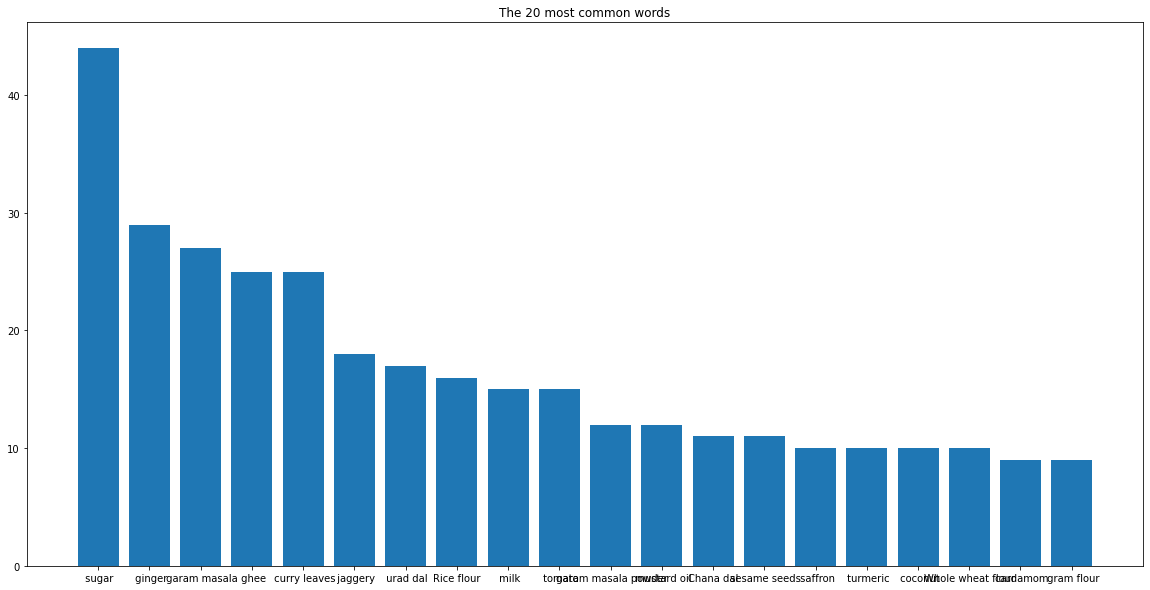

In [40]:
x, y = zip(*all_words_counter.most_common(20))
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x, y)
ax.set_title('The 20 most common words')